### 13강.1. Import Library 분석에 사용할 모듈

In [1]:
# 관리자 권한으로 실행했던 Anaconda Prompt와 동일한 역할하는 코드
!python -m pip install --user --upgrade pip

In [31]:
# Ignore the warnings
import warnings
# warnings.filterwarning("always")
warnings.filterwarnings("ignore")

# System related and Data input controls
import os

import re
from typing import *
import missingno as msno

# Web Scraping & Crawling
import requests
from bs4 import BeautifulSoup
from xml.etree import ElementTree as ET

import urllib.request
import json
from pandas.io.json import json_normalize

# Data manipulation and visualization
import pandas as pd
import datetime
# pd.options.display.float_format = "{:, 0.2f}".format
# pd.options.display.max_rows = 100
# pd.options.display.max_columns = 20
# pd.set_option("display.max_rows", None)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Modeling algorithms
# (1) General
import statsmodels.api as sm
from scipy import stats

# (2) Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for Regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

In [3]:
# pip install virtualenv
# pip3 install --user selenium
# python3 -m pip install request

In [4]:
from sys import executable                                                        
print(executable)
# C:\ProgramData\anaconda3\python.exe

import sys
print(sys.path)
# C:\programdata\anaconda3\lib\site-packages

# [Error]
# python3 -m ipykernel install --user
# /C:/ProgramData/anaconda3/python -m pip install request
# !{sys.executable} -m pip install request
# !conda install --yes --prefix {sys.prefix} request

C:\ProgramData\anaconda3\python.exe
['D:\\', 'C:\\ProgramData\\anaconda3\\python310.zip', 'C:\\ProgramData\\anaconda3\\DLLs', 'C:\\ProgramData\\anaconda3\\lib', 'C:\\ProgramData\\anaconda3', '', 'C:\\Users\\sooyeon Kang\\AppData\\Roaming\\Python\\Python310\\site-packages', 'C:\\ProgramData\\anaconda3\\lib\\site-packages', 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\Pythonwin']


### 13강.2. Data Loading: 분석에 사용할 데이터 불러오기
* https://github.com/cherieuu/Online_lecture/blob/master/TSA_AtoZ/Practice3_DataAnalysis_Cycle_KK.ipynb
* https://aliencoder.tistory.com/11

In [7]:
# GetRepoTradInfoService
    # 기준일자, RP거래일자를 조회하여 
    # 건별거래, 매입증권별잔고금액, 통화별잔고금액을 제공하는 금융위원회_REPO거래정보
    
class GetRepoTradingInfoService():
    
    def __init__(self, 
                 request_url: str, 
                 parameters = None,
                 response = None, 
                 repo_object = None):
        
        self.request_url = request_url
        self.response = response
        self.repo_object = repo_object
            # encoding key = "XaWt3XckF7z5yo3JX%2BMBifN3A6o6cBoIlo3hB0sZznUGKpCHCcOZz4ifqAYfWcRPYLWjJG2dbqEFUXfmr29Xzg%3D%3D"
            # decoding key = "XaWt3XckF7z5yo3JX+MBifN3A6o6cBoIlo3hB0sZznUGKpCHCcOZz4ifqAYfWcRPYLWjJG2dbqEFUXfmr29Xzg=="

            
# requestHTMLWebpage()
    def requestHTMLWebpage(self, baseDate: str):
        
    # 공공데이터포털에서 xml 데이터 요청
        parameters ={
            "serviceKey" : "XaWt3XckF7z5yo3JX+MBifN3A6o6cBoIlo3hB0sZznUGKpCHCcOZz4ifqAYfWcRPYLWjJG2dbqEFUXfmr29Xzg==", 
            "numOfRows" : "1", 
            "pageNo" : "1", 
            "resultType" : "xml", 
            "basDt" : baseDate}
            # 분석에 활용하기 위한 수집 방법
                # 파라미터 딕셔너리의 key값을 변수로 변환하여 class의 method return값을 for문을 통해 날짜별로 생성하여
                # 전역공간에 데이터프레임으로 일별 환매조건부매매채권 데이터 1차원 배열을 병합

        response = requests.get(
            self.request_url, 
            params = parameters)
            # timeout = 0.1)
        self.response = response
            # request_url
                # [통화별잔고금액] http://apis.data.go.kr/1160100/service/GetRepoItemInfoService/getInteRateInfo
                # [건별거래조회] http://apis.data.go.kr/1160100/service/GetRepoTradInfoService/getCaseForTrad
                # [매입증권별 잔고금액 조회] http://apis.data.go.kr/1160100/service/GetRepoTradInfoService/getBuyiSecuBala
        # print(response.content)
        # print(response.text)
                # 요청한 웹페이지 문서가 로드되었는지 확인용
            
    # 데이터 수집
        soup_object = BeautifulSoup(response.content, 
                            "lxml-xml")
        repo_object = soup_object.find_all("item")
        self.repo_object = repo_object
        
        
# getInterestRateData()
# REPO 종목정보
    def getInterestRateData(self):
    
    # 데이터 정리
        RepoInterestData: List = []
    
        for i in range(len(self.repo_object)):
            
            baseDate = self.repo_object[i].basDt.string.strip()
            repoID = self.repo_object[i].rpSqno.string.strip()
            repoBuySecurities = self.repo_object[i].rpBuyScrtKcd.string.strip()
            repoBuyApplyCurrent = self.repo_object[i].rpBuyAplCurCd.string.strip()
            repoBuyApplyCurrentNM = self.repo_object[i].rpBuyAplCurCdNm.string.strip()
            repoDepositTermCode = self.repo_object[i].rdptTermCcd.string.strip()
            repoDepositTermCodeNM = self.repo_object[i].rdptTermCcdNm.string.strip()
            repoRemainingExprDcd = self.repo_object[i].rpRmngExprDcd.string.strip()
            repoRemainingExprDcdNm = self.repo_object[i].rpRmngExprDcdNm.string.strip()
            purchaseBzTypeCode = self.repo_object[i].purcBzcTcd.string.strip()
            purchaseBzTypeCodeNM = self.repo_object[i].purcBzcTcdNm.string.strip()
            sellerBzTypeCode = self.repo_object[i].slrBzcTcd.string.strip()
            sellerBzTypeCodeNM = self.repo_object[i].slrBzcTcdNm.string.strip()
            repoInterest = self.repo_object[i].rpInrt.string.strip()
    
            RepoInterestData = [
                baseDate, repoID, 
                repoBuySecurities, repoBuyApplyCurrent, repoBuyApplyCurrentNM, 
                repoDepositTermCode, repoDepositTermCodeNM, repoRemainingExprDcd, repoRemainingExprDcdNm,
                purchaseBzTypeCode, purchaseBzTypeCodeNM, sellerBzTypeCode, sellerBzTypeCodeNM, repoInterest]
    
            RepoInterestData.append(RepoInterestData)
        
        return RepoInterestData
    

# getTradingData()
# Repo 거래정보
    def getTradingData(self):  
        
        listofItems: List = []
        listofItems = [[data.text for data in item] for item in self.repo_object]
        listofItems = list(*listofItems)
        listofItem = list(filter(lambda data: data != "\n", listofItems))
        
        return listofItem
    
    
    # Rest API 호출 결과를 xml 객체로 변환 후 
    # for문 list comprehension을 활용하여 items 태그 내 데이터 수집
    # -> 실패
    
        # tree = ET.fromstring(self.response.content)
        # ET.dump(tree)
        # ET.indent(tree, space = "   ")
        # items = tree[1][0]
            # tree = [header, [[item, item, ... ], numOfRows, pageNo, totalCount]]
        # listofItems: List = []
        # listofItems = [[data.text for data in item] for item in self.repo_object]
        
        # return listofItems
        
        
        # response_url = urllib.request.urlopen(self.request_url, params = self.parameters)
        # json_string = response_url.read().decode("utf-8")
        # json_object = json.loads(json_string)
        
        
        # target_date = baseDate
        # start_date = datetime.date.fromisoformat(target_date)
        # request_days = 365
        # target_dates = (
        # (start_date + datetime.timedelta(days = i) ).strftime("%Y%m%d") 
        # for i in range(0, request_days))
        # request = self.request_url + 
        # urls = [request_url.format(date) for date in target_dates]

        # return urls

##### 1. 환매조건부채권 금리

In [8]:
getRepoInterest = GetRepoTradingInfoService(
    request_url = "http://apis.data.go.kr/1160100/service/GetRepoItemInfoService/getInteRateInfo"
)

In [9]:
getRepoInterest.requestHTMLWebpage(
    baseDate = "20200304")

In [10]:
getRepoInterest.getInterestRateData()
    # baseDate | 기준일자
    # repoID | RP일련번호
    # repoBuySecurities | 기업어음의 매입증권 종류를 관리하는 코드 (통안채, 국채, 은행채 등)
    # repoBuyApplyCurrent | 기업어음의 매입증권 종류를 관리하는 코드 (통안채, 국채, 은행채 등)
    # repoBuyApplyCurrentNM | 환매조건부채권(RP)을 매입 할때 적용되는 통화를 관리하는 코드의 명칭
    # repoDepositTermCode | 상환 기간에 따라 기간을 분류한 코드
    # repoDepositTermCodeNM | 상환 기간에 따라 기간을 분류한 코드의 명칭
    # repoRemainingExprDcd | 기업어음(RP)의 잔존 만기 기간을 구분하는 코드
    # repoRemainingExprDcdNM | 기업어음(RP)의 잔존 만기 기간을 구분하는 코드의 명칭
    # purchaseBzTypeCode | 매수자 업종별 유형을 관리하는 코드
    # purchaseBzTypeCodeNM| 매수자 업종별 유형을 관리하는 코드의 명칭
    # sellerBzTypeCode | 매도자 업종별 유형을 관리하는 코드
    # sellerBzTypeCodeNM | 매도자 업종별 유형을 관리하는 코드의 명칭
    # repoInterest | 환매조건부채권거래 매수자 제공 매입금액에 대한 이율

['20200304',
 '202003040001',
 '1150',
 'KRW',
 '대한민국 원',
 '1',
 '1영업일',
 '11',
 '1년이하',
 '0202',
 '은행(신탁)',
 '0101',
 '증권사',
 '1.43',
 [...]]

##### 2. 

1) getCaseForTrad : RP이율, RP증거금비율, 매입증권매입금액, 매입증권평가금액등을 조회하는 건별거래조회
2) getBuyiSecuBala : RP국채담보금액, RP금융채담보금액, 지방채담보금액, 담보총합계금액등을 조회
3) getCurrBala : RP거래일자를 통하여 거래유형코드, RP매입적용통화코드, RP매입적용통화코드명, RP통화잔액등을 조회

In [11]:
getCaseForTrading = GetRepoTradingInfoService(
    request_url = "http://apis.data.go.kr/1160100/service/GetRepoTradInfoService/getCaseForTrad"
)
getBuyiSecuritiesBalance = GetRepoTradingInfoService(
    request_url = "http://apis.data.go.kr/1160100/service/GetRepoTradInfoService/getBuyiSecuBala"
)
getCurrentBalanceSheet =  GetRepoTradingInfoService(
    request_url = "http://apis.data.go.kr/1160100/service/GetRepoTradInfoService/getCurrBala"
)

In [12]:
# self.repo_object
getCaseForTrading.requestHTMLWebpage(baseDate = "20200304")

# self.response.text
getCaseForTrading.getTradingData()

# [instance] getBuyiSecuritiesBalance | getCurrentBalanceSheet

['20200304',
 '9600000000',
 '10000000000',
 '10088000000',
 '0202',
 '은행(신탁)',
 'KR6005271798',
 '대구은행38-09이36A-14',
 '1',
 '1영업일',
 '9600000000',
 'KRW',
 '대한민국 원',
 '1.43',
 '105',
 '20200304',
 '11',
 '1년이하',
 '202003040001',
 '1150',
 '은행채',
 '0101',
 '증권사']

In [14]:
CaseForTradingRepo = pd.DataFrame()
col_num = 0
dates = pd.date_range(
    "2020-01-01", 
    "2023-01-01",
    freq = "D")
    # [freq] D, M, Y
    # start_date = pd.to_datetime('2020-01-01')
    # end_date = pd.to_datetime('2023-01-01')
date_list = dates.strftime("%Y%m%d").tolist()

In [15]:
for date in dates:
    getCaseForTrading.requestHTMLWebpage(
        baseDate = date)
    CaseForTradingRepo.loc[col_num, :] = getCaseForTrading.getTradingData()
    col_num += 1
        # IndexError: iloc cannot enlarge its target object
        # ValueError: cannot set a frame with no defined index and a scalar

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

##### ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

ConnectTimeout: HTTPConnectionPool(host='apis.data.go.kr', port=80): Max retries exceeded with url: /1160100/service/GetRepoTradInfoService/getCaseForTrad?serviceKey=XaWt3XckF7z5yo3JX%2BMBifN3A6o6cBoIlo3hB0sZznUGKpCHCcOZz4ifqAYfWcRPYLWjJG2dbqEFUXfmr29Xzg%3D%3D&numOfRows=1&pageNo=1&resultType=xml&basDt=2020-03-22+00%3A00%3A00 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x000001B9477E1CC0>, 'Connection to apis.data.go.kr timed out. (connect timeout=None)'))

In [ ]:
CaseForTradingRepo

In [ ]:
CaseForTradingRepo.to_csv(
    "D:/Archive/RepoCaseForTradingData.csv", 
    index = False
)

---

In [16]:
# DT교육과정 활용데이터 출처 : kaggle competitions download -c bike-sharing-demand

# location = "D:/Archive/EcommerceData_1.csv"
# ecommerce_raw_data = pd.read_csv(location, index_col = False, encoding = "latin")
# ecommerce_raw_data["InvoiceDate"] = pd.to_datetime(ecommerce_raw_data["InvoiceDate"])
# ecommerce_raw_data.info()
    # ctrl + ? + /
    # ecommerce_raw_data.describe(include = "all").T

In [17]:
class TimeSeriesCommercialDataAnalysis():
    
    def __init__(self, location: str, ecommerce_data = None):
        
        self.location = location
        self.ecommerce_data = ecommerce_data
       
    
    def loadData(self):
        ecommerce_raw_data = pd.read_csv(
            self.location, 
            index_col = False,
            encoding = "latin")
            # UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 79780: invalid start byte
        
        ecommerce_raw_data.drop(
            ["Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"], 
            axis = 1, inplace = True)
        ecommerce_raw_data["Working Date"] = pd.to_datetime(ecommerce_raw_data["Working Date"])
        ecommerce_raw_data["created_at"] = pd.to_datetime(ecommerce_raw_data["created_at"])
        
    # EDA : 데이터 컬럼의 중복 여부 확인
        # ecommerce_raw_data["Working Date"] == ecommerce_raw_data["created_at"]
    # 날짜 변수(YYYY-MM-DD)를 인덱스(행)으로 선언 
        ecommerce_raw_data.set_index("created_at", inplace = True)
        # if ecommerce_raw_data.index.dtype == "int64":
            # ecommerce_raw_data.reset_index(drop = False, inplace = True)
    
    # 날짜 행의 중복을 해소하기 위해 데이터프레임 인덱싱
        # Setting frequency of time series data
        # ecommerce_raw_data = ecommerce_raw_data.asfreq("M")
            # ValueError: cannot reindex on an axis with duplicate labels
            
        print( ecommerce_raw_data.index.is_unique,
               ecommerce_raw_data.index.duplicated() )
        ecommerce_data = ecommerce_raw_data.copy()
        # ecommerce_data.flags.allows_duplicate_labels = False
        self.ecommerce_data = ecommerce_data.loc[~ecommerce_data.index.duplicated(), :]
        # ecommerce_data.asfreq("D")
        
        print(ecommerce_raw_data.info()) 
        return self.ecommerce_data

    
    def VisualizeTimeSeriesPlot(self):
        
        ecommerce_description = self.ecommerce_data.describe(include = "all").T
        ecommerce_description
        
        msno.bar(self.ecommerce_data)

        self.ecommerce_data[["grand_total", "price"]].plot(
            kind = "line", figsize = (20, 6),
            linewidth = 3, fontsize = 20,
            # xlim = ("2016-07-01", "2018-08-28"),
            ylim = (0, 1000) )
        plt.title("Time Series of Target", fontsize = 20)
        plt.xlabel("Index", fontsize = 15)
        plt.ylabel("Demand", fontsize = 15)
        plt.show()
        
        return ecommerce_description
        
    # sm.tsa.seasonal_decompose({분해요소], model={분해방법})
        # {분해요소} : DataFrame의 column
        # {분해방법} : 'additive'=(추세+계절성+잔차), 'multiplicative'=(추세*계절성*잔차)
        # 분해 방법은 상황에 따라 적절히 판단한다.
    
    # covariance = ( np.sum(X*Y) - len(X)*np.mean(Y) )/len(X)
    # covaraince = np.cov(X, Y)[0, 1]
    
    def DecomposeTrendSeasonalResid(self):
        
        print(
            np.all(np.isfinite(self.ecommerce_data["price"])),"\n",
            self.ecommerce_data.isnull().sum(),"\n",
        # dataframe[datafframe['column'].isnull()]
            self.ecommerce_data[self.ecommerce_data["price"].isnull()],"\n",
            self.ecommerce_data.drop("NaT", axis = 
                                     0, inplace = True),"\n",
            self.ecommerce_data.isnull().sum() )
    # 시계열 분해 : y(t) = Level * Trend * Seasonality * Noise
        # ValueError: This function does not handle missing values

        self.ecommerce_data = self.ecommerce_data.asfreq("D")
        plt.rcParams["figure.figsize"] = (14, 8)
        timeseries_price = sm.tsa.seasonal_decompose(
            x = self.ecommerce_data["price"],
            model = "additive")
            # additive : split data as trend + seasonal + residual
        timeseries_price.plot()

        plt.show()
            # ValueError: You must specify a period or x must be a pandas object 
            # with a PeriodIndex or a DatetimeIndex with a freq not set to None
            
    # split data as trend * seasonal * residual
        sm.tsa.seasonal_decompose(
            x = self.ecommerce_data["price"],
            model = "mutiplicative").plot()
        plt.show()

        
    # 잔차의 특성을 EDA
        # split data as trend + seasonal + residual

        result = sm.tsa.seasonal_decompose(
            self.ecommerce_data["price"],
            model = "additive")
        print(result.resid,"\n",
              ((result.observed - result.trend - result.seasonal) == result.resid).sum(),"\n",
              pd.DataFrame(result.resid).describe() )
        self.result = result
              
    
    def TimeSeriesEDA(self):

    # 시계열의 추세와 계절성
        Y_trend = self.result.trend
        Y_trend.fillna(method = "ffill", inplace = True)
        Y_trend.columns = ["count_trend"]
        Y_seasonal = self.result.seasonal
        Y_seasonal.fillna(method = "ffill", inplace = True)
        Y_seasonal.columns = ["count_seasonal"]

    # 원 데이터와 2 컬럼을 병합
        print(
            pd.concat(
                [self.ecommerce_data, Y_trend, Y_seasonal], axis = 1
        ).isnull().sum() )

        if "count_trend" not in commerce_data.columns:
            if "count_seasonal" not in commerce_data.columns:
                self.ecommerce_data = pd.concat(
                    [self.ecommerce_data, Y_trend, Y_seasonal],
                    axis = 1
                )
    # 이동평균(앞뒤로 12일씩 24일) comparison of several moving average values
    # 앞 뒤로 24개의 데이터를 묶어달라는 것
        pd.concat(
            [
                self.ecommerce_data[["price"]],
                self.ecommerce_data[["price"]].rolling( 24 ).mean(),
                self.ecommerce_data[["price"]].rolling( 24*7 ).mean()
            ], axis = 1).plot(kind = "line", figsize = (20, 6), linewidth = 3, fontsize = 20)
                              # xlim = ("2017-01-01", "2018-01-01"))
        plt.title("Time Series of Target", fontsize = 20)
        plt.xlabel("Index", fontsize = 15)
        plt.ylabel("Demand", fontsize = 15)
        plt.show()
        
        return self.ecommerce_data

In [18]:
TSA = TimeSeriesCommercialDataAnalysis(
    location = "D:/Archive/LargestEcommerceData_Pakistan.csv")

In [19]:
commerce_data = TSA.loadData()
    # 품목 ID, 주문 상태(완료, 취소, 환불), 주문 날짜, SKU, 가격, 수량, 총합계, 카테고리, 결제 방법 및 고객 ID

False [False  True  True ...  True  True  True]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2016-07-01 to NaT
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   sku                    584504 non-null  object        
 3   price                  584524 non-null  float64       
 4   qty_ordered            584524 non-null  float64       
 5   grand_total            584524 non-null  float64       
 6   increment_id           584524 non-null  object        
 7   category_name_1        584360 non-null  object        
 8   sales_commission_code  447349 non-null  object        
 9   discount_amount        584524 non-null  float64       
 10  payment_method         584524 non-null  object        
 11  Working Date           584524 non-null  dateti

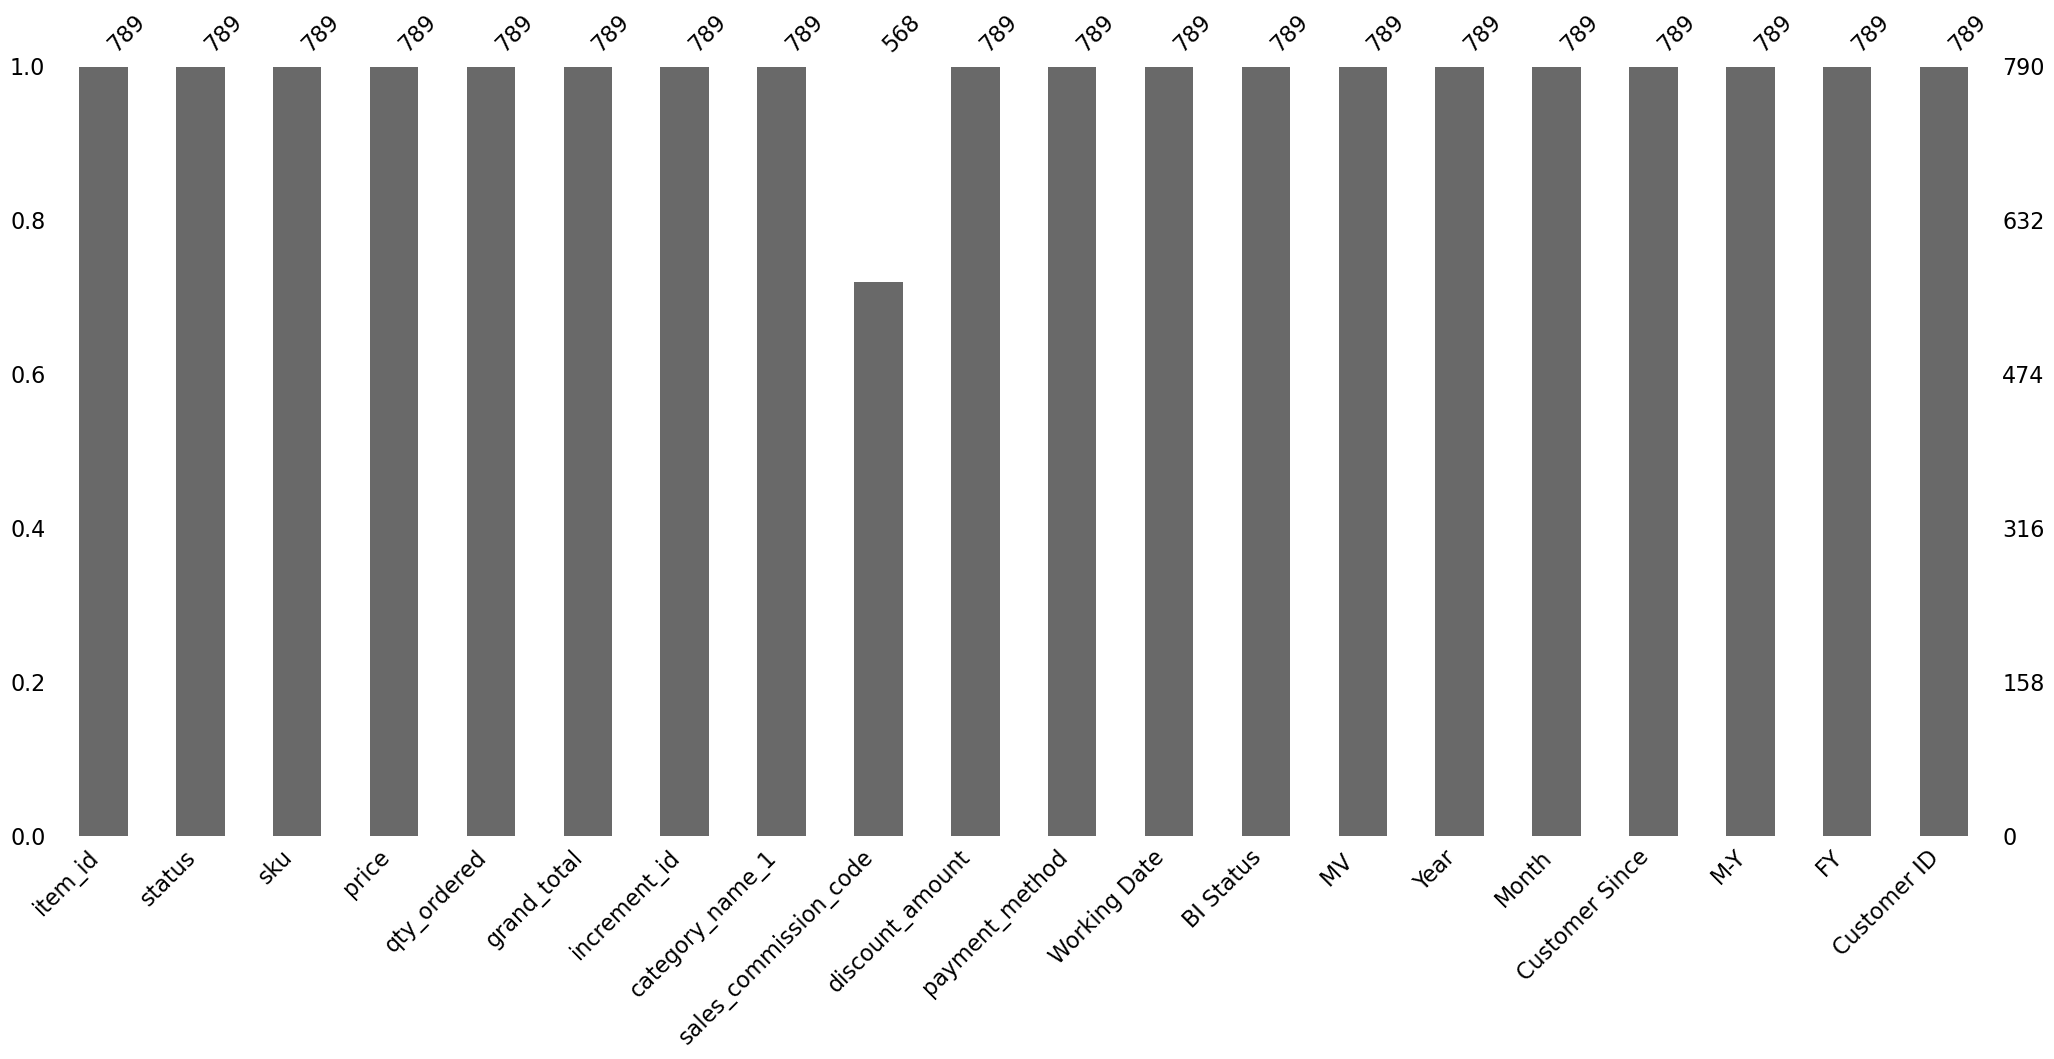

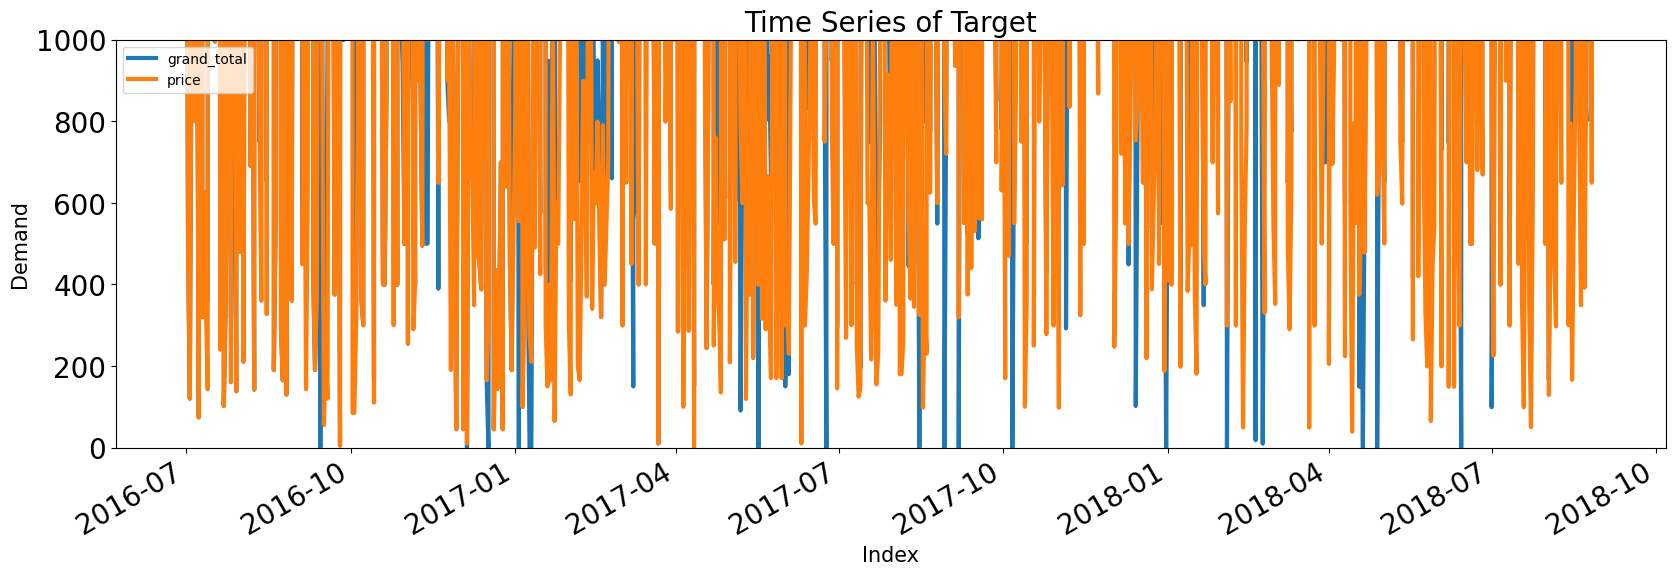

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
item_id,789.0,NaN,NaN,NaN,NaT,NaT,556334.589354,218436.571172,211131.0,388137.0,545963.0,742849.0,905100.0
status,789,9,complete,310,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku,789,730,kcc_krone deal,4,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,789.0,NaN,NaN,NaN,NaT,NaT,7827.023828,17671.98524,1.0,495.0,1150.0,4770.0,116699.0
qty_ordered,789.0,NaN,NaN,NaN,NaT,NaT,1.225602,1.02249,1.0,1.0,1.0,1.0,20.0
grand_total,789.0,NaN,NaN,NaN,NaT,NaT,8776.203029,19288.732634,0.0,798.0,1495.0,6277.0,165337.0
increment_id,789.0,789.0,100147443.0,1.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_name_1,789,16,Mobiles & Tablets,198,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_commission_code,568,51,\N,488,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount_amount,789.0,NaN,NaN,NaN,NaT,NaT,178.330573,844.551149,0.0,0.0,0.0,0.0,12500.0


In [20]:
TSA.VisualizeTimeSeriesPlot()

False 
 item_id                    1
status                     1
sku                        1
price                      1
qty_ordered                1
grand_total                1
increment_id               1
category_name_1            1
sales_commission_code    222
discount_amount            1
payment_method             1
Working Date               1
BI Status                  1
 MV                        1
Year                       1
Month                      1
Customer Since             1
M-Y                        1
FY                         1
Customer ID                1
dtype: int64 
             item_id status  sku  price  qty_ordered  grand_total increment_id  \
created_at                                                                      
NaT             NaN    NaN  NaN    NaN          NaN          NaN          NaN   

           category_name_1 sales_commission_code  discount_amount  \
created_at                                                          
NaT            

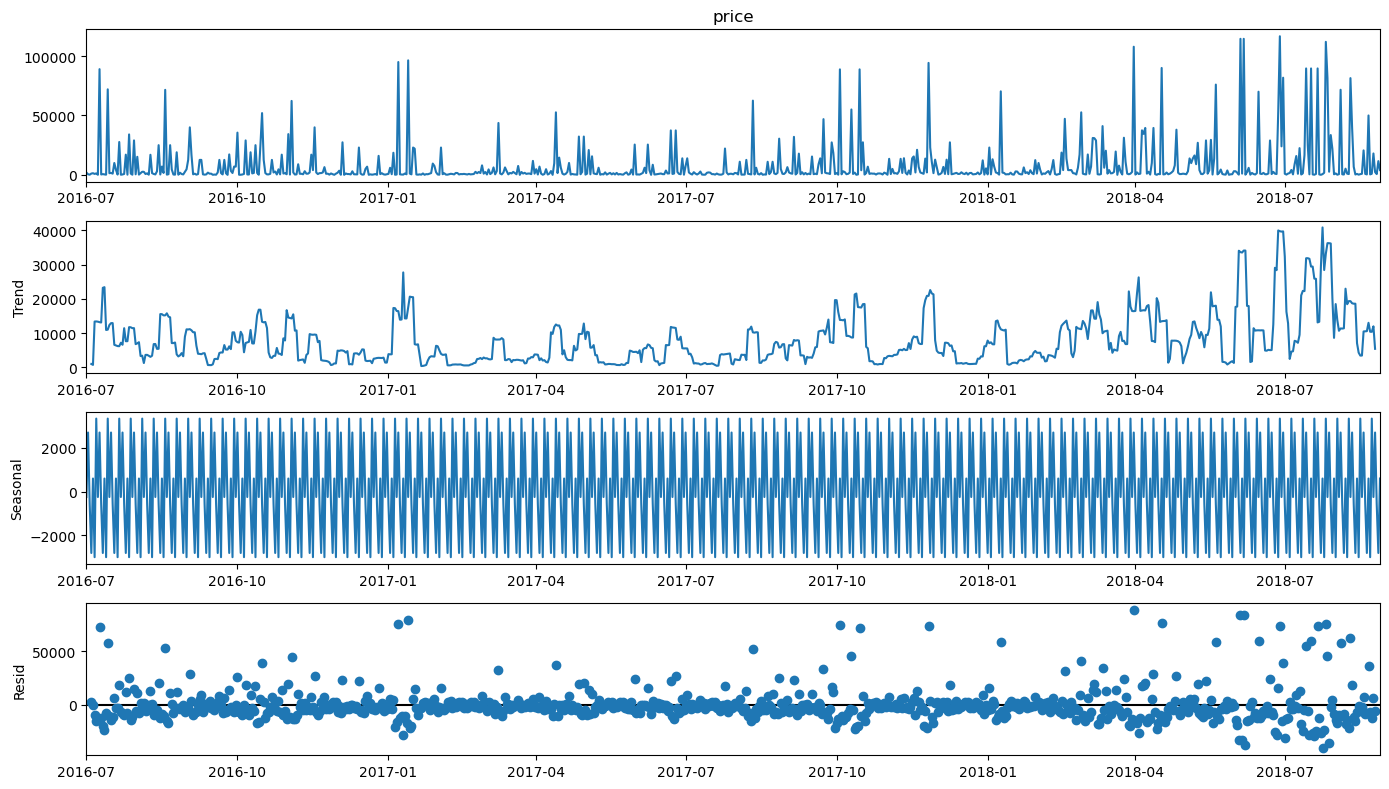

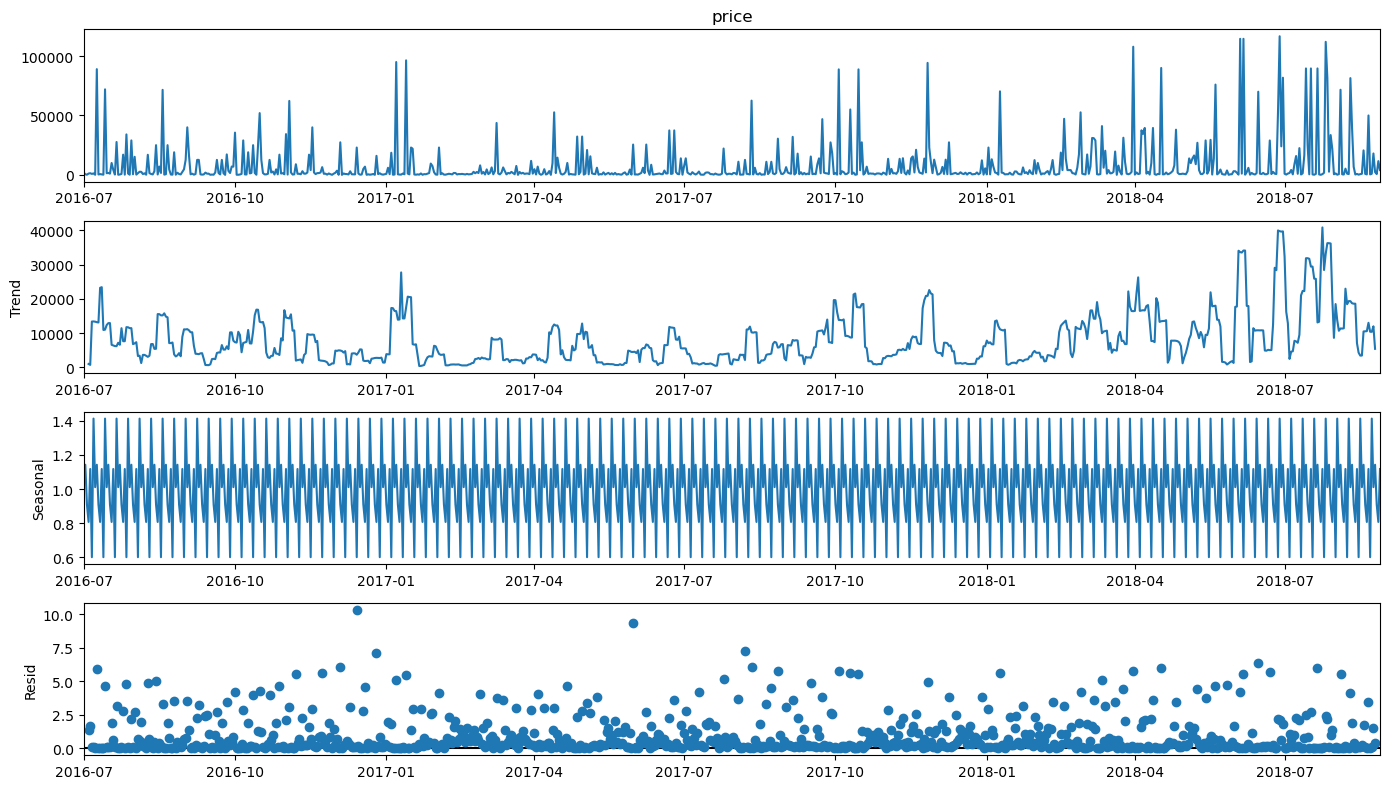

created_at
2016-07-01            NaN
2016-07-02            NaN
2016-07-03            NaN
2016-07-04    2889.385482
2016-07-05      44.557038
                 ...     
2018-08-24    6262.614947
2018-08-25   -5751.906610
2018-08-26            NaN
2018-08-27            NaN
2018-08-28            NaN
Freq: D, Name: resid, Length: 789, dtype: float64 
 783 
               resid
count    783.000000
mean       2.644028
std    15994.594766
min   -40825.328676
25%    -6801.760564
50%    -2211.319747
75%     2065.350406
max    88780.807676


In [21]:
TSA.DecomposeTrendSeasonalResid()

item_id                    0
status                     0
sku                        0
price                      0
qty_ordered                0
grand_total                0
increment_id               0
category_name_1            0
sales_commission_code    221
discount_amount            0
payment_method             0
Working Date               0
BI Status                  0
 MV                        0
Year                       0
Month                      0
Customer Since             0
M-Y                        0
FY                         0
Customer ID                0
trend                      3
seasonal                   0
dtype: int64


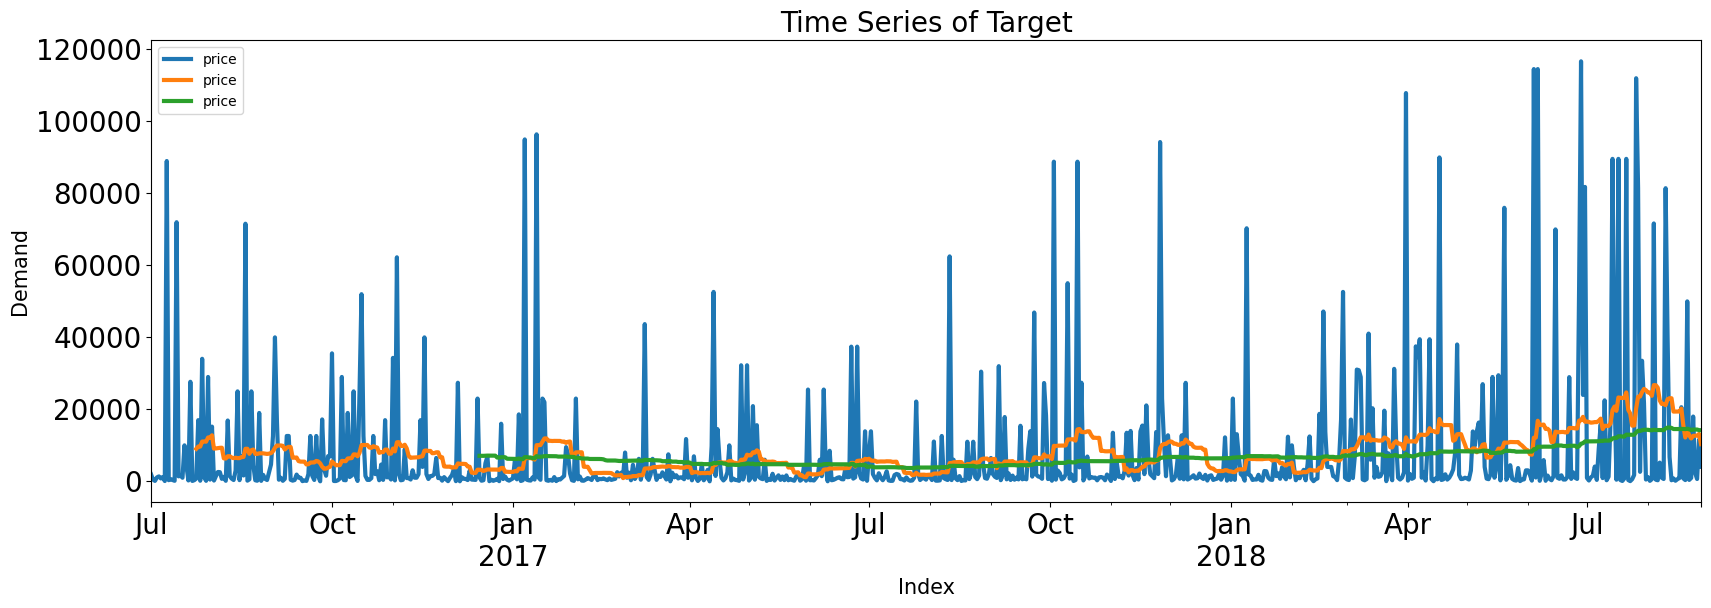

In [22]:
new_ecommerce_data = TSA.TimeSeriesEDA()
    # count_diff를 생성하는 것의 이점이 있나
    # ???

In [23]:
# 그룹을 구분할 수 있다는 점

pd.cut(new_ecommerce_data["grand_total"], 10)[-30:]
    # Categories (2, interval[float64, right]): [(-165.337, 82668.5] < (82668.5, 165337.0]]
    # Categories (3, interval[float64, right]): [(-165.337, 55112.333] < (55112.333, 110224.667] < (110224.667, 165337.0]]
    # Categories (10, interval[float64, right]): [(-165.337, 16533.7] < (16533.7, 33067.4] < (33067.4, 49601.1] < (49601.1, 66134.8] ... (99202.2, 115735.9] < (115735.9, 132269.6] < (132269.6, 148803.3] < (148803.3, 165337.0]]

created_at
2018-07-30     (16533.7, 33067.4]
2018-07-31    (-165.337, 16533.7]
2018-08-01    (-165.337, 16533.7]
2018-08-02    (-165.337, 16533.7]
2018-08-03    (-165.337, 16533.7]
2018-08-04     (66134.8, 82668.5]
2018-08-05    (-165.337, 16533.7]
2018-08-06    (-165.337, 16533.7]
2018-08-07    (-165.337, 16533.7]
2018-08-08    (-165.337, 16533.7]
2018-08-09    (-165.337, 16533.7]
2018-08-10     (66134.8, 82668.5]
2018-08-11     (33067.4, 49601.1]
2018-08-12    (-165.337, 16533.7]
2018-08-13    (-165.337, 16533.7]
2018-08-14    (-165.337, 16533.7]
2018-08-15    (-165.337, 16533.7]
2018-08-16    (-165.337, 16533.7]
2018-08-17    (-165.337, 16533.7]
2018-08-18     (16533.7, 33067.4]
2018-08-19    (-165.337, 16533.7]
2018-08-20    (-165.337, 16533.7]
2018-08-21     (49601.1, 66134.8]
2018-08-22    (-165.337, 16533.7]
2018-08-23    (-165.337, 16533.7]
2018-08-24     (16533.7, 33067.4]
2018-08-25     (16533.7, 33067.4]
2018-08-26    (-165.337, 16533.7]
2018-08-27    (-165.337, 16533.7]
201

___

In [24]:
new_ecommerce_data["grand_total_group"] = pd.cut(new_ecommerce_data["grand_total"], 10)
new_ecommerce_data[["grand_total_group"]]

,grand_total_group
created_at,
2016-07-01,"(-165.337, 16533.7]"
2016-07-02,"(-165.337, 16533.7]"
2016-07-03,"(-165.337, 16533.7]"
2016-07-04,"(-165.337, 16533.7]"
2016-07-05,"(-165.337, 16533.7]"
...,...
2018-08-24,"(16533.7, 33067.4]"
2018-08-25,"(16533.7, 33067.4]"
2018-08-26,"(-165.337, 16533.7]"


In [25]:
new_ecommerce_data["Working Date"].dt.year
print(new_ecommerce_data["Working Date"].dt.quarter)
4*( new_ecommerce_data["Working Date"].dt.year - new_ecommerce_data["Working Date"].dt.year.min() )

created_at
2016-07-01    3
2016-07-02    3
2016-07-03    3
2016-07-04    3
2016-07-05    3
             ..
2018-08-24    3
2018-08-25    3
2018-08-26    3
2018-08-27    3
2018-08-28    3
Freq: D, Name: Working Date, Length: 789, dtype: int64


created_at
2016-07-01    0
2016-07-02    0
2016-07-03    0
2016-07-04    0
2016-07-05    0
             ..
2018-08-24    8
2018-08-25    8
2018-08-26    8
2018-08-27    8
2018-08-28    8
Freq: D, Name: Working Date, Length: 789, dtype: int64

In [26]:
# 지연값 lagging
"""
new_ecommerce_data["price_lag_1day"] = new_ecommerce_data["price"].shift(1)
new_ecommerce_data["price_lay_2day"] = new_ecommerce_data["price"].shift(1)
new_ecommerce_data["price_lag_1day"].fillna(method = "bfill")
new_ecommerce_data["price_lag_2day"].fillna(method = "bfill")
"""
# 더미변수(시간정보를 반영)
# 봄, 여름, 가을까지만 X 독립변수를 모형에 입력하고, 겨울은 투입하지 않아도 된다. 
# (차원의 저주) 다만 확실한 패턴이 존재하는 경우에만 효과가 있으며, 오히려 모델의 오류를 증가시킬 수 있다. 
"""
pd.get_dummies(new_ecommerce_data["Quarter"])
pd.get_dummies(new_ecommerce_data["Quarter"], 
               prefix = "Quarter_Dummy".
               drop_first = True)
"""

'\npd.get_dummies(new_ecommerce_data["Quarter"])\npd.get_dummies(new_ecommerce_data["Quarter"], \n               prefix = "Quarter_Dummy".\n               drop_first = True)\n'

In [27]:
[
    column for column in new_ecommerce_data.select_dtypes(include = ["float", "integer"]).columns
    if column != "price"
]

['item_id',
 'qty_ordered',
 'grand_total',
 'discount_amount',
 'Year',
 'Month',
 'Customer ID',
 'trend',
 'seasonal']

### 19강. Applying Base Model : y예측 위한 Base 분석 수행

* https://github.com/cherieuu/Online_lecture/blob/master/TSA_AtoZ/Lecture3_Algorithms_TimeSeries_Linear_Univariate_KK.ipynb
* 데이터 출처 : https://kr.investing.com/

In [14]:
class ApplyingModel():
    
    def __init__(self, 
                 US30Cash = None, US500Cash = None, US2000Cash = None, USTech100Cash = None,
                 chinaA50Futures = None, IndiaNifty50Futures = None, 
                 KOSPI200Futures = None, KOSPI61 = None, KOSPI62 = None, KOSPI63 = None):
        
        self.chinaA50Futures = chinaA50Futures
        self.US30Cash = US30Cash
        self.US500Cash = US500Cash
        self.US2000Cash = US2000Cash
        self.USTech100Cash = USTech100Cash
        self.IndiaNifty50Futures = IndiaNifty50Futures
        self.KOSPI200Futures = KOSPI200Futures
        
        self.KOSPI61 = KOSPI61
        self.KOSPI62 = KOSPI62
        self.KOSPI63 = KOSPI63

        
    def loadFuturesData(self):
    
    # f"D:/Archive/{file_name}.csv"
    # file_name 입력값으로 설정
        US30Cash = pd.read_csv(
            "D:/Archive/US 30 Cash 과거 데이터.csv", index_col = 0)
        US500Cash = pd.read_csv(
            "D:/Archive/US 500 Cash 과거 데이터.csv", index_col = 0)
        US2000Cash = pd.read_csv(
            "D:/Archive/US 2000 Cash 과거 데이터.csv", index_col = 0)
        USTech100Cash = pd.read_csv(
            "D:/Archive/US Tech 100 Cash 과거 데이터.csv", index_col = 0)
        chinaA50Futures = pd.read_csv(
            "D:/Archive/China A50 선물 과거 데이터.csv", index_col = 0)
        IndiaNifty50Futures = pd.read_csv(
            "D:/Archive/인도 니프티 선물 과거 데이터.csv", index_col = 0)
        KOSPI200Futures = pd.read_csv(
            "D:/Archive/코스피200 선물 (F) 선물 과거 데이터.csv", index_col = 0) 
        KOSPI61 = pd.read_csv(
            "D:/Archive/KOSPI Large Sized 과거 데이터.csv", index_col = 0)
        KOSPI62 = pd.read_csv(
            "D:/Archive/KOSPI Medium Sized 과거 데이터.csv", index_col = 0)
        KOSPI63 = pd.read_csv(
            "D:/Archive/KOSPI Small Sized 과거 데이터.csv", index_col = 0)
        
        volatility = pd.concat(
            [US30Cash["변동 %"], US500Cash["변동 %"], US2000Cash["변동 %"], USTech100Cash["변동 %"],
             chinaA50Futures["변동 %"], IndiaNifty50Futures["변동 %"], KOSPI200Futures["변동 %"], 
             KOSPI61["변동 %"], KOSPI62["변동 %"], KOSPI63["변동 %"] ], 
            axis = 1)
        
        volatility.columns = [
            "US30Cash", "US500Cash", "US2000Cash", "USTech100Cash", 
            "chinaA50Futures", "IndiaNifty50Futures", "KOSPI200Futures", 
            "KOSPI61", "KOSPI62", "KOSPI63"]
        volatility = volatility.apply(lambda futures: futures.str.replace("%", ""))
        volatility = volatility.select_dtypes(include = "object").astype("float")
        
        return volatility



```
# mergeData()
# 최근 3년간 주가지수선물의 시장가격, 변동성, 거래량 데이터 셋 생성
    def mergeData(self): 
                  # dataFrame1: pd.DataFrame, dataFrame2: pd.DataFrame, key: str):
    
        columns: List = [
            "self.US30Cash", "self.US500Cash", "self.US2000Cash", "self.USTech100Cash",
            "self.chinaA50Futures", "self.IndiaNifty50Futures", 
            "self.KOSPI61", "self.KOSPI62", "self.KOSPI63"]
            
        # volatility = pd.merge(
            # dataFrame1[["날짜", "변동 %"]], dataFrame2[["날짜", "변동 %"]], key = "날짜")
        
        volatility = self.KOSPI200Futures
        
        for dataFrame in columns:
            volatility = pd.merge(
                dataFrame[["날짜", "변동 %"]], 
                    # [TypeError] string indices must be integers 
                volatility, 
                key = "날짜")
        
        return volatility
        

closed_price = pd.DataFrame(
    columns = ["US30Cash", "US500Cash", "US2000Cash", "USTech100Cash",
               "chinaA50Futures", "IndiaNifty50Futures", "Kospi200Futures"]
)
dates = pd.date_range(
    start =  "2020-01-01",
    end = "2023-05-22",
    freq = "D"
)
closed_price.index = dates
    # [ValueError] Length mismatch: Expected axis has 0 elements, new values have 1238 element


volatility = pd.DataFrame(index = Kospi200Futures["날짜"])
volatility["US30Cash"] = US30Cash["변동 %"]
volatility["US500Cash"] = US500Cash["변동 %"]
volatility["US2000Cash"] = US2000Cash["변동 %"]
volatility["USTech100Cash"] = USTech100Cash["변동 %"]
volatility["chinaA50Futures"] = chinaA50Futures["변동 %"]
volatility["IndiaNifty50Futures"] = IndiaNifty50Futures["변동 %"]
volatility["Kospi200Futures"] = Kospi200Futures["변동 %"]
    # global["_i".format(i)]
volatility.index = Kospi200Futures["날짜"]
```

In [15]:
ML = ApplyingModel()

In [16]:
volatility_matrix = ML.loadFuturesData()

In [17]:
volatility_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 2023- 05- 22 to 2020- 02- 01
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   US30Cash             983 non-null    float64
 1   US500Cash            982 non-null    float64
 2   US2000Cash           984 non-null    float64
 3   USTech100Cash        982 non-null    float64
 4   chinaA50Futures      881 non-null    float64
 5   IndiaNifty50Futures  884 non-null    float64
 6   KOSPI200Futures      837 non-null    float64
 7   KOSPI61              838 non-null    float64
 8   KOSPI62              838 non-null    float64
 9   KOSPI63              838 non-null    float64
dtypes: float64(10)
memory usage: 85.2+ KB


##### 결국 좌표평면상 점과 직선 간 거리를 최소화하는 직선을 구하는 것(잔차제곱합을 최소화)

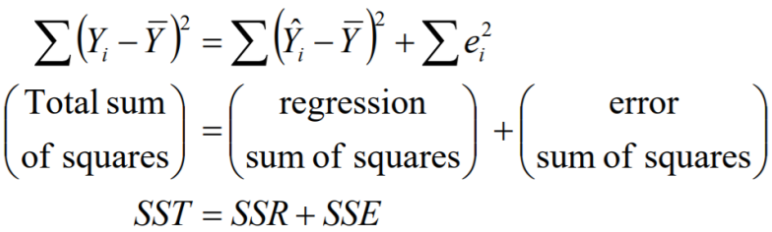

In [24]:
"""
# Pseudo Code

repeat until convergence {
    tmp_i = w_i - alpha * dw_i
    w_i = tmp_i
}
"""

class LinearRegression():
    
    def __init__(self, learning_rate, iterations, 
                 m = None, n = None, W = None,
                 X_train = None, y_train = None, X_test = None, y_test = None):
        
        self.learning_rate = learning_rate
        self.iterations = iterations
        
        self.m = m
        self.n = n
        self.W = W
        
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        
    def fit(self, target: str, data: pd.DataFrame):
        
        np.random.seed(2023)
        X = data.drop(target, axis = 1)
        y = data[target]
        self.m, self.n = X.shape
        self.B = 0
    # Weight initialization
        self.W = np.zeros(self.n)
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size = 0.5 )

    # Gradient descent learning
    # 클래스 내부 멤버함수를 캡슐화하는 방법
        for i in range(self.iterations):
            self.updateWeights()
        
        return self
    
# funtion to update weights in gradient descent
    def updateWeights(self):
        
        y_pred = self.predict()
    # calculate gradients : Q&A
        dW = -(2*( self.X_test.T ).dot( self.y_test - y_pred )) / self.m
        dB = -2*np.sum( self.y_test - y_pred ) / self.m
            # 오차제곱합의 평균값 ?
        
    # update weights
        self.W = self.W - self.learning_rate * dW
        self.B = self.B - self.learning_rate * dB
        
        return self
    
# Hypothetical function h(x)
    def predict(self):
        
        return self.X_test.dot(self.W) + self.B
        
        
# driver code로 main함수를 따로 생성하는 방식으로 개선할 것

```
# <__main__.LinearRegression at 0x2f01837f5b0>

lm = LinearRegression(
    learning_rate = 0.05,
    iterations = 1000
)

lm.fit(
    target = "KOSPI200Futures",
    data = volatility_matrix
)
    # ValueError: Input y contains NaN.
    # TypeError: LinearRegression.predict() takes 1 positional argument but 2 were given
```

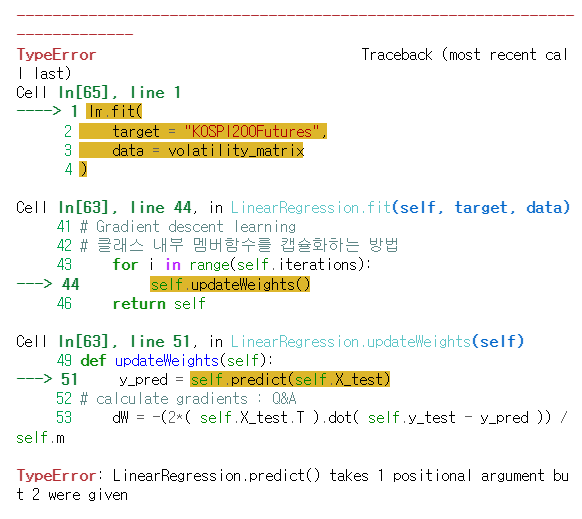

In [27]:
def main():
    lm = LinearRegression(
        learning_rate = 0.05,
        iterations = 1000)
    lm.fit(
        target = "KOSPI200Futures", data = volatility_matrix)
    y_pred = lm.predict()
    print("예측값", np.round(y_pred, 2))
    # print("실제값", self.y_test[:3])
    print("학습 가중치", round(lm.W[0], 2))
    print("추정 회귀계수", round(lm.B, 2))

In [28]:
if __name__ == "__main__" : 
    main()
        # NaN Error

예측값 날짜
2022- 12- 28   NaN
2020- 09- 28   NaN
2020- 11- 19   NaN
2022- 04- 05   NaN
2020- 01- 31   NaN
                ..
2020- 07- 01   NaN
2021- 12- 12   NaN
2022- 05- 15   NaN
2022- 12- 05   NaN
2020- 06- 09   NaN
Length: 496, dtype: float64
학습 가중치 nan
추정 회귀계수 -0.0


___

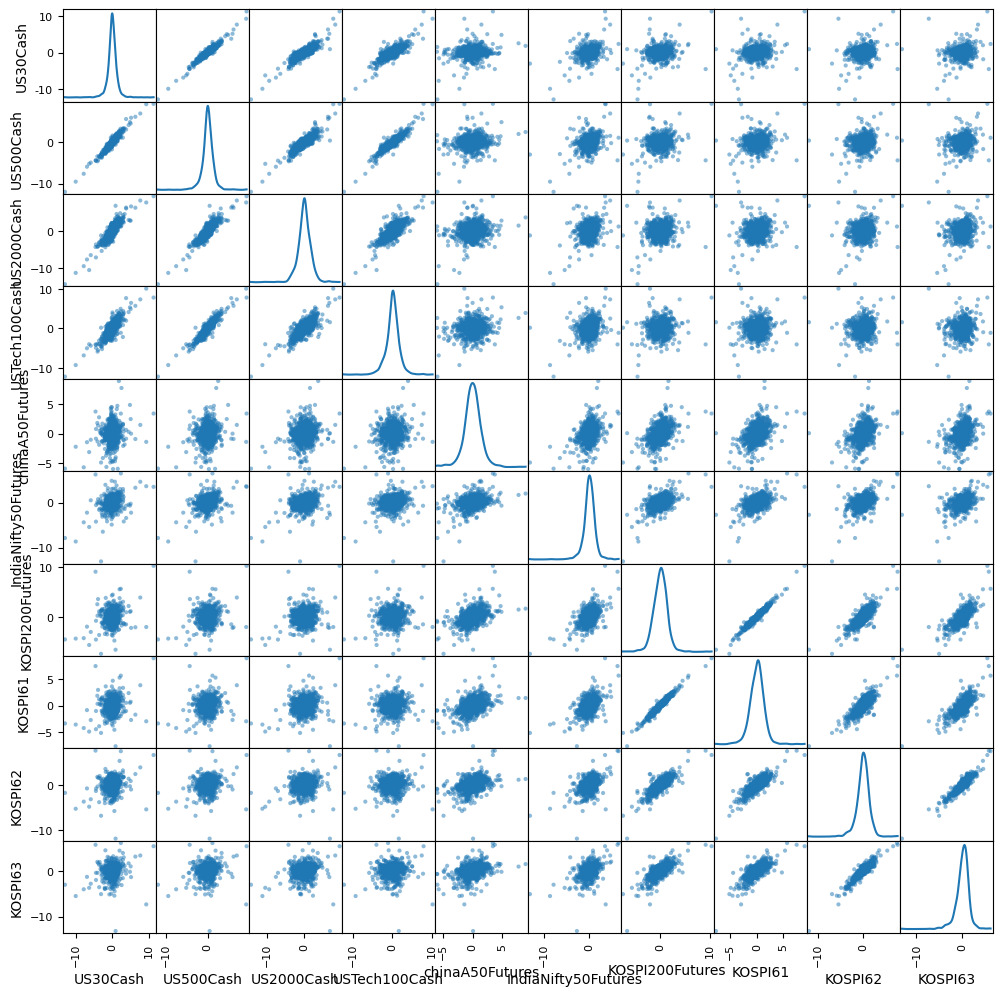

In [23]:
pd.plotting.scatter_matrix(
    volatility_matrix, 
    figsize = (12, 12), 
    diagonal = "kde" )
plt.show()

In [74]:
# rng = np.random.default_rng()
# X = rng.random(10)


X = volatility_matrix.drop(["KOSPI200Futures"], axis = 1)
y = volatility_matrix["KOSPI200Futures"]

"""
linearModel = stats.linregress(X, y)
    # Missing values are considered pair-wise
    # ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 9 and the array at index 1 has size 992
"""

'\nlinearModel = stats.linregress(X, y)\n    # Missing values are considered pair-wise\n    # ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 9 and the array at index 1 has size 992\n'

In [75]:
random_state = np.random.RandomState(2023)
correlation_matrix = volatility_matrix.apply(lambda data: (data - np.mean(data)) / np.std(data)).corr()
volatility_matrix.corr().style.background_gradient().set_precision(2)
    # set_properties(**{"font-size" : "15pt"})
    
    # y와 X의 상관관계, 분포의 괴리가 크며, 
    # X간의 상관관계는 큰 경우가 real life의 데이터에서 빈번하다.

,US30Cash,US500Cash,US2000Cash,USTech100Cash,chinaA50Futures,IndiaNifty50Futures,KOSPI200Futures,KOSPI61,KOSPI62,KOSPI63
US30Cash,1.00,0.96,0.88,0.82,0.21,0.37,0.25,0.24,0.20,0.19
US500Cash,0.96,1.00,0.89,0.93,0.20,0.36,0.22,0.21,0.17,0.17
US2000Cash,0.88,0.89,1.00,0.79,0.21,0.34,0.20,0.20,0.16,0.14
USTech100Cash,0.82,0.93,0.79,1.00,0.18,0.27,0.13,0.13,0.10,0.10
chinaA50Futures,0.21,0.20,0.21,0.18,1.00,0.38,0.47,0.45,0.39,0.34
IndiaNifty50Futures,0.37,0.36,0.34,0.27,0.38,1.00,0.56,0.53,0.48,0.44
KOSPI200Futures,0.25,0.22,0.20,0.13,0.47,0.56,1.00,0.98,0.82,0.74
KOSPI61,0.24,0.21,0.20,0.13,0.45,0.53,0.98,1.00,0.82,0.76
KOSPI62,0.20,0.17,0.16,0.10,0.39,0.48,0.82,0.82,1.00,0.93
KOSPI63,0.19,0.17,0.14,0.10,0.34,0.44,0.74,0.76,0.93,1.00


<Axes: >

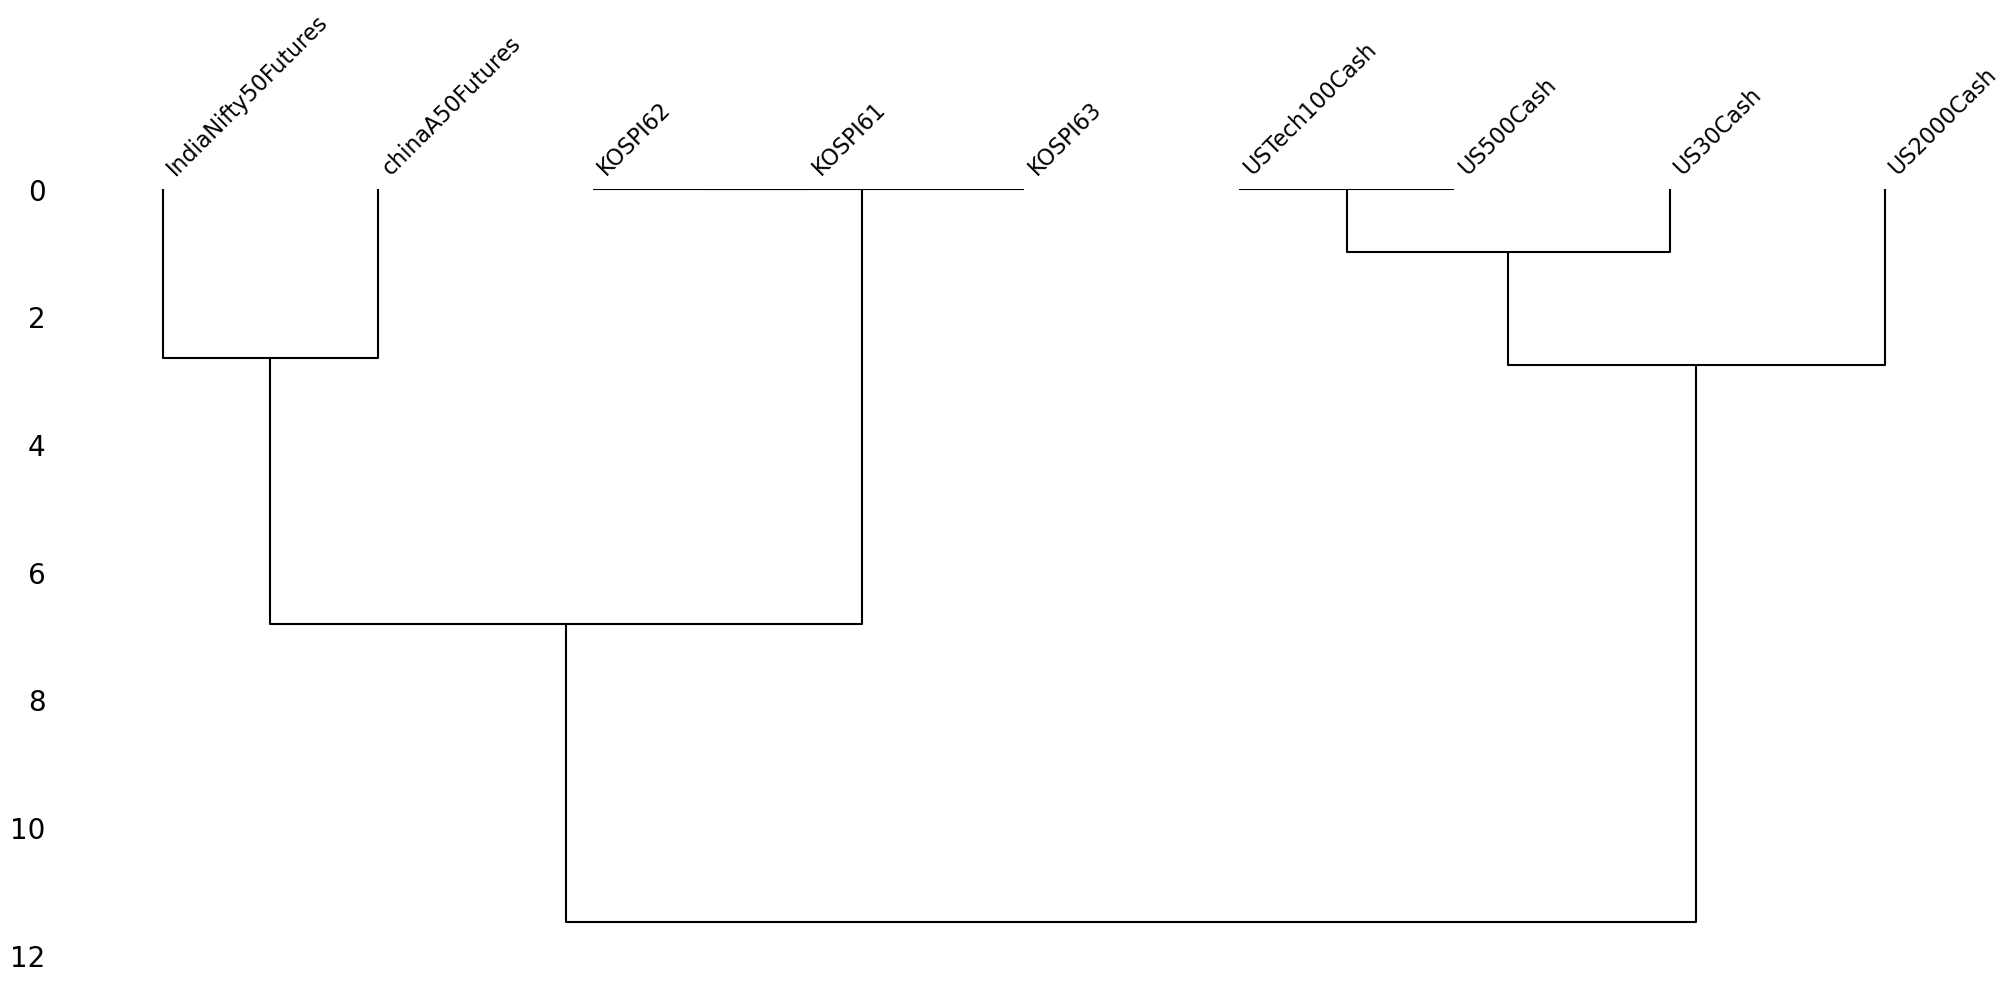

In [76]:
msno.dendrogram(X)

In [78]:
from sklearn.impute import *
from scipy import interpolate
# from scipy.interpolate import make_interp_spline
    # KNNImputer
    # MissingIndicator
    # from impyute.imputation.cs import fast_knn
# X = X.interpolate(method = "polynomial", order = 2) 

# sklearn.preprocessing.RobustScaler
# https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/preprocessing/_data.py#L1362
X = X.apply(
    lambda data: (data - np.median(data)) / (np.percentile(data, 75) - np.percentile(data, 25))
)
    # interqualtile_range = Q3 - Q1
    
# 선형 보간법 (Linear Interpolation)
# X = interpolate.interp1d(X, y, kind = "linear")
# 스플라인 보간법 (Spline Interpolation)

X = X.interpolate(method = "linear", axis = 0)
# X = interpolate.interp2d(X, y, kind = "quadratic")
    # TypeError: interp2d.__init__() missing 1 required positional argument: 'z'
    # ValueError: the x array must have exactly one dimension.
X.isnull().sum()

TypeError: interp2d.__init__() missing 1 required positional argument: 'z'

In [ ]:
X["Time Series"] = volatility_matrix.index
X["Time Series"] = pd.to_datetime(X["Time Series"])
X.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.5
)

```
# https://stefvanbuuren.name/fimd/

for i in [volatility_matrix.KOSPI63.index]:
    
    i = 0
    if pd.isnull(volatility_matrix.KOSPI63[index[i]]):
       # 선형식 추정 회귀계수
           a = w_1 * volatility_matrix.chinaA50Futures[index[i]] + w_2 * volatility_matrix.IndiaNifty50Futures[index[i]] + b
        # "NaN" 결측값 대체 using .set_value
           volatility_matrix.set_value(index[i], "KOSPI63", a)
```

```
volatility_matrix["KOSPI63"] = volatility_matrix.apply(
    lambda row:
        w_1 * volatility_matrix.chinaA50Futures + \
        w_2 * volatility_matrix.IndiaNifty50Futures + \
        b
        
        if np.isnan(row.KOSPI63) else row.KOSPI63, axis = 1
)
```

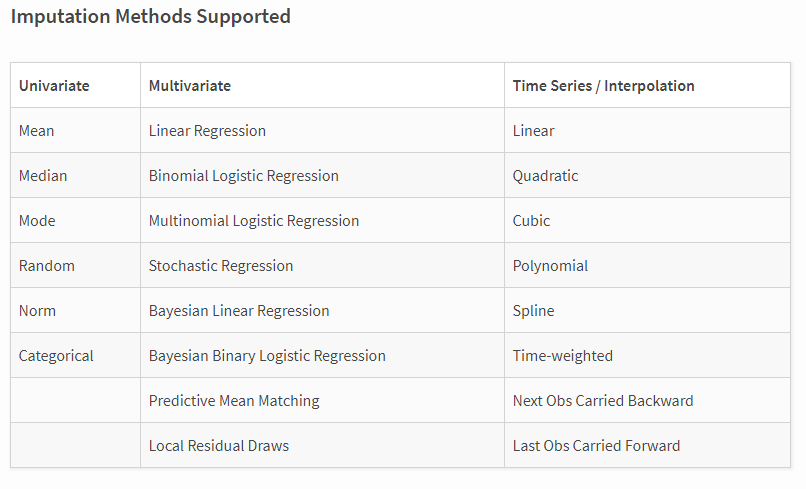

In [47]:
linearModel = sm.OLS(
    y_train, X_train, missing = "raise")
    # MissingDataError: NaNs were encountered in the data

MissingDataError: NaNs were encountered in the data

___

##### 검증지표(evaluation metrics)와 잔차진단 방향(residuals diagnostics or error analysis)

* 예측분석 이후 예측이 잘 되었는지 그리고 데이터의 시간패턴이 잘 추출되었는지 평가하는 것이 중요하다. 
* 시간특성 패턴이 잘 추출되었는지 확인하기 위해서 잔차(또는 에러)진단을 통해 백색잡음(white noise)과 얼마나 유사한지 측정한다. 